# Pandas + Seaborn Básico

Notebook guiado para la clase de 3 horas.

Objetivo: cargar, limpiar, agregar y visualizar datos de logs con `pandas` y `seaborn`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid", context="notebook")
pd.set_option("display.max_columns", 50)

print("OK Imports cargados correctamente")

OK Imports cargados correctamente


## Setup rápido (ejecutar esto si saltas celdas)

Si quieres ejecutar celdas avanzadas sin ejecutar todo el notebook, ejecuta esta celda primero.

## 1) Carga del dataset

Usamos el dataset preparado para esta sesión. El Titanic es un dataset clásico con 891 pasajeros y 12 variables (edad, clase, tarifa, supervivencia, etc).

In [2]:
df = pd.read_csv("data/titanic.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2) Inspeccion rápida

Antes de filtrar o graficar, valida estructura y tipos. `info()` muestra tipos y nulos, `describe()` resume estadísticas numericas.

In [3]:
df.info()
df.describe(include="all").T.head(10)

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 118.9 KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## 3) Primer gráfico en seaborn

Visualizamos variables clave para entender la distribucion del dataset. Seaborn trabaja directamente sobre DataFrames y aplica estilos automaticos.

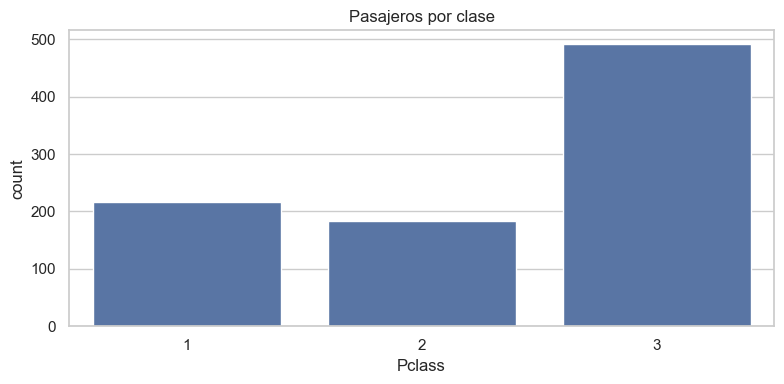

In [4]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="Pclass")
ax.set_title("Pasajeros por clase")
plt.tight_layout()

## 4) Seleccion y filtrado

Boolean indexing: combinar condiciones con &, |, ~. Siempre usar parentesis.

In [5]:
# Ejemplo 1: filtro compuesto con AND
subset_df = df.loc[(df["Pclass"] == 3) & (df["Fare"] < 15), ["Name", "Sex", "Age", "Fare", "Embarked"]]
print(f"Pasajeros en 3a clase con tarifa < 15: {len(subset_df)}")
subset_df.head()

Pasajeros en 3a clase con tarifa < 15: 357


,Name,Sex,Age,Fare,Embarked
0,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
2,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
4,"Allen, Mr. William Henry",male,35.0,8.0500,S
5,"Moran, Mr. James",male,NaN,8.4583,Q
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S


In [6]:
# Ejemplo 2: filtro con OR
women_or_first_class = df.loc[(df["Sex"] == "female") | (df["Pclass"] == 1)]
print(f"Mujeres O primera clase: {len(women_or_first_class)}")

# Ejemplo 3: filtro con NOT (~)
not_survived = df.loc[~(df["Survived"] == 1)]
print(f"No sobrevivientes: {len(not_survived)}")

# Ejemplo 4: isin para múltiples valores
embarked_sc = df.loc[df["Embarked"].isin(["S", "C"])]
print(f"Embarcados en S o C: {len(embarked_sc)}")

Mujeres O primera clase: 436
No sobrevivientes: 549
Embarcados en S o C: 812


In [7]:
# Ejemplo 5: between para rangos
adults_young = df.loc[df["Age"].between(18, 35)]
print(f"Adultos jovenes (18-35): {len(adults_young)}")

# Ejemplo 6: query - sintaxis más limpia
queried = df.query("Pclass == 1 and Survived == 1 and Sex == 'female'")
print(f"Mujeres supervivientes de 1a clase: {len(queried)}")

Adultos jovenes (18-35): 384
Mujeres supervivientes de 1a clase: 91


## 5) Limpieza básica de tipos y nulos

Titanic ya viene con nulos reales, ideal para practicar limpieza. Age y Cabin tienen valores faltantes que debemos tratar antes de analizar.

In [8]:
clean = df.copy()

clean["Age"] = pd.to_numeric(clean["Age"], errors="coerce")
clean["Fare"] = pd.to_numeric(clean["Fare"], errors="coerce")
clean["Embarked"] = clean["Embarked"].fillna(clean["Embarked"].mode()[0])
clean["Age"] = clean["Age"].fillna(clean["Age"].median())

clean.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

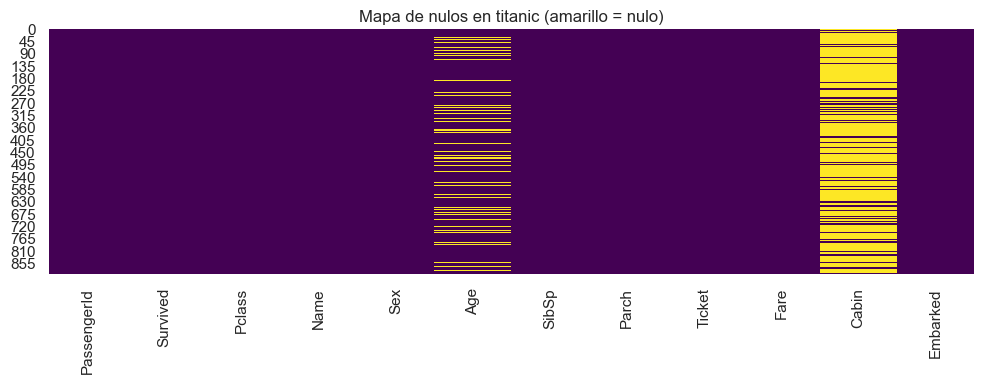

In [9]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Mapa de nulos en titanic (amarillo = nulo)")
plt.tight_layout()

## 6) Agregacion y visualizacion

Resumimos por clase y sexo, y vemos supervivencia por edad. Groupby es una de las operaciones más potentes de pandas para análisis exploratorio.

In [10]:
agg_survival = (
    clean.groupby(["Pclass", "Sex"], as_index=False)
         .agg(passengers=("PassengerId", "count"), survival_rate=("Survived", "mean"))
         .sort_values(["Pclass", "Sex"])
)
agg_survival.head()

,Pclass,Sex,passengers,survival_rate
0,1,female,94,0.968085
1,1,male,122,0.368852
2,2,female,76,0.921053
3,2,male,108,0.157407
4,3,female,144,0.500000


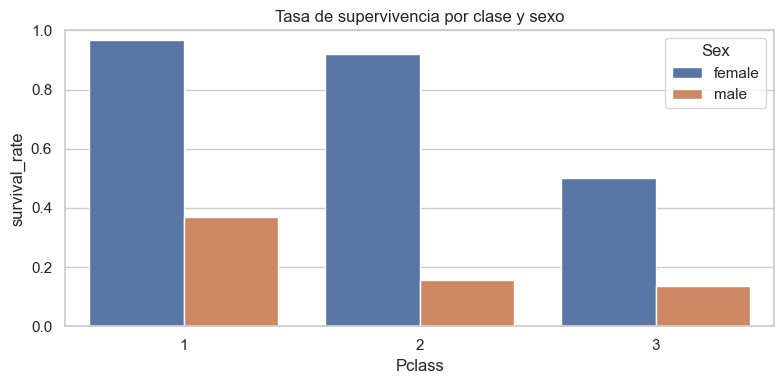

In [11]:
plt.figure(figsize=(8, 4))
sns.barplot(data=agg_survival, x="Pclass", y="survival_rate", hue="Sex")
plt.title("Tasa de supervivencia por clase y sexo")
plt.ylim(0, 1)
plt.tight_layout()

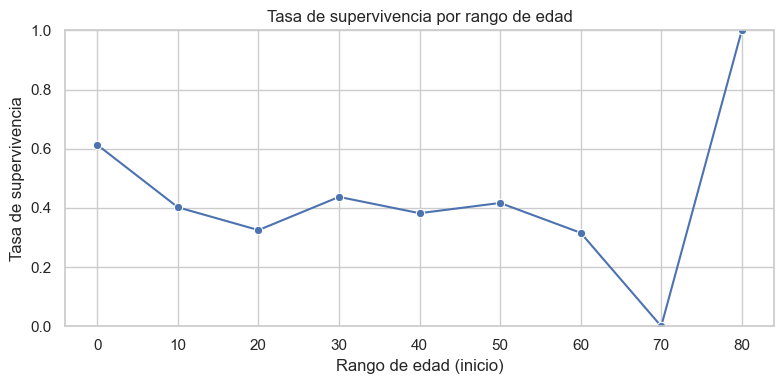

In [12]:
age_curve = (
    clean.assign(age_bin=(clean["Age"] // 10) * 10)
         .groupby("age_bin", as_index=False)
         .agg(survival_rate=("Survived", "mean"))
         .sort_values("age_bin")
)

plt.figure(figsize=(8, 4))
sns.lineplot(data=age_curve, x="age_bin", y="survival_rate", marker="o")
plt.title("Tasa de supervivencia por rango de edad")
plt.xlabel("Rango de edad (inicio)")
plt.ylabel("Tasa de supervivencia")
plt.ylim(0, 1)
plt.tight_layout()

## 7) Series vs DataFrame

Una Serie es una columna con indice. Un DataFrame es una coleccion de Series.

In [13]:
# Serie: una columna
ages = clean["Age"]
print(type(ages), ages.shape)

# DataFrame: varias columnas
subset = clean[["Name", "Age", "Sex"]]
print(type(subset), subset.shape)

<class 'pandas.Series'> (891,)
<class 'pandas.DataFrame'> (891, 3)


## 8) Index como ciudadano de primera clase

El indice no es solo decoracion: acelera lookups y facilita joins.

In [14]:
# Usar PassengerId como indice
indexed = clean.set_index("PassengerId")
indexed.head(3)

# Lookup rápido por indice
indexed.loc[5]

Survived                           0
Pclass                             3
Name        Allen, Mr. William Henry
Sex                             male
Age                             35.0
SibSp                              0
Parch                              0
Ticket                        373450
Fare                            8.05
Cabin                            NaN
Embarked                           S
Name: 5, dtype: object

In [15]:
# MultiIndex: indices jerárquicos
multi_idx = clean.set_index(["Pclass", "Sex"])
multi_idx.head()

# Filtrar por nivel de indice
multi_idx.loc[(3, "male")].head()

/var/folders/lg/tx5z3m_n3md59nq1vd0h_qwr0000gn/T/ipykernel_22231/3497677119.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  multi_idx.loc[(3, "male")].head()


PassengerId  Survived                            Name   Age  \
Pclass Sex                                                                 
3      male            1         0         Braund, Mr. Owen Harris  22.0   
       male            5         0        Allen, Mr. William Henry  35.0   
       male            6         0                Moran, Mr. James  28.0   
       male            8         0  Palsson, Master. Gosta Leonard   2.0   
       male           13         0  Saundercock, Mr. William Henry  20.0   

             SibSp  Parch     Ticket     Fare Cabin Embarked  
Pclass Sex                                                    
3      male      1      0  A/5 21171   7.2500   NaN        S  
       male      0      0     373450   8.0500   NaN        S  
       male      0      0     330877   8.4583   NaN        Q  
       male      3      1     349909  21.0750   NaN        S  
       male      0      0  A/5. 2151   8.0500   NaN        S

## 9) Groupby avanzado: agg, transform, apply

`agg` resume, `transform` mantiene forma original, `apply` es flexible pero lento.

In [16]:
# agg: resume
clean.groupby("Pclass").agg({"Age": ["mean", "std"], "Fare": "median"})

Age                Fare
             mean        std   median
Pclass                               
1       36.812130  14.182103  60.2875
2       29.765380  13.581096  14.2500
3       25.932627  10.697676   8.0500

In [17]:
# transform: devuelve serie del mismo tamaño que el df original
clean["age_vs_class_mean"] = clean.groupby("Pclass")["Age"].transform("mean")
clean[["PassengerId", "Pclass", "Age", "age_vs_class_mean"]].head()

,PassengerId,Pclass,Age,age_vs_class_mean
0,1,3,22.0,25.932627
1,2,1,38.0,36.812130
2,3,3,26.0,25.932627
3,4,1,35.0,36.812130
4,5,3,35.0,25.932627


In [18]:
# Agregacion con nombres custom (más legible)
clean.groupby("Pclass").agg(
    edad_promedio=("Age", "mean"),
    edad_std=("Age", "std"),
    tarifa_mediana=("Fare", "median"),
    pasajeros=("PassengerId", "count")
).round(2)

,edad_promedio,edad_std,tarifa_mediana,pasajeros
Pclass,,,,
1,36.81,14.18,60.29,216
2,29.77,13.58,14.25,184
3,25.93,10.70,8.05,491


In [19]:
# apply: flexible pero lento - usar solo si no hay alternativa vectorizada
def custom_func(group):
    return group["Age"].max() - group["Age"].min()

clean.groupby("Pclass").apply(custom_func, include_groups=False)

Pclass
1    79.08
2    69.33
3    73.58
dtype: float64

In [20]:
# Diferencia clave: agg reduce, transform mantiene forma
print("Forma original:", clean.shape)
print("Forma despues de agg:", clean.groupby("Pclass").agg({"Age": "mean"}).shape)

# Con transform obtenemos una columna del tamano original
clean["age_diff_vs_class"] = clean["Age"] - clean.groupby("Pclass")["Age"].transform("mean")
clean[["PassengerId", "Pclass", "Age", "age_vs_class_mean", "age_diff_vs_class"]].head(8)

Forma original: (891, 13)
Forma despues de agg: (3, 1)


,PassengerId,Pclass,Age,age_vs_class_mean,age_diff_vs_class
0,1,3,22.0,25.932627,-3.932627
1,2,1,38.0,36.812130,1.187870
2,3,3,26.0,25.932627,0.067373
3,4,1,35.0,36.812130,-1.812130
4,5,3,35.0,25.932627,9.067373
5,6,3,28.0,25.932627,2.067373
6,7,1,54.0,36.812130,17.187870
7,8,3,2.0,25.932627,-23.932627


## 10) Merge / Join

Combinar dataframes por columna o indice. Senior entiende left/right/inner/outer.

In [21]:
# Crear tabla auxiliar de precios de clase
prices = pd.DataFrame({"Pclass": [1, 2, 3], "base_price": [100, 50, 20]})

# Left join: mantiene todas las filas del df principal
merged = pd.merge(clean.head(10), prices, on="Pclass", how="left")
merged[["PassengerId", "Pclass", "Fare", "base_price"]].head()

,PassengerId,Pclass,Fare,base_price
0,1,3,7.2500,20
1,2,1,71.2833,100
2,3,3,7.9250,20
3,4,1,53.1000,100
4,5,3,8.0500,20


In [22]:
# Join por indice (alternativa a merge)
df1 = clean.set_index("PassengerId")[["Name", "Sex"]].head(5)
df2 = clean.set_index("PassengerId")[["Age", "Fare"]].head(7)

df1.join(df2, how="inner")

,Name,Sex,Age,Fare
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,22.0,7.2500
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
3,"Heikkinen, Miss. Laina",female,26.0,7.9250
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
5,"Allen, Mr. William Henry",male,35.0,8.0500


## 11) Performance: evitar loops

Nunca iterar fila por fila. Usar operaciones vectorizadas.

In [23]:
# Comparar diferentes tipos de joins
df_left = clean[["PassengerId", "Name", "Pclass"]].head(5)
df_right = clean[["PassengerId", "Age", "Fare"]].iloc[3:8]

print("Left tiene:", len(df_left), "filas")
print("Right tiene:", len(df_right), "filas")

# Inner: solo coincidencias
inner = pd.merge(df_left, df_right, on="PassengerId", how="inner")
print(f"\nInner join: {len(inner)} filas (solo PassengerId en ambos)")

# Left: mantiene todas de la izquierda
left = pd.merge(df_left, df_right, on="PassengerId", how="left")
print(f"Left join: {len(left)} filas (todas las de df_left)")

# Outer: union de ambas
outer = pd.merge(df_left, df_right, on="PassengerId", how="outer")
print(f"Outer join: {len(outer)} filas (union completa)")

Left tiene: 5 filas
Right tiene: 5 filas

Inner join: 2 filas (solo PassengerId en ambos)
Left join: 5 filas (todas las de df_left)
Outer join: 8 filas (union completa)


In [24]:
# MAL: loop
# for i, row in clean.iterrows():
#     clean.at[i, "adult"] = 1 if row["Age"] >= 18 else 0

# BIEN: vectorizacion
clean["adult"] = (clean["Age"] >= 18).astype(int)
clean[["Age", "adult"]].head()

,Age,adult
0,22.0,1
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,1


In [25]:
import numpy as np

# MAL Lento: apply
# clean["fare_category"] = clean["Fare"].apply(lambda x: "high" if x > 30 else "low")

# BIEN Rapido: np.where
clean["fare_category"] = np.where(clean["Fare"] > 30, "high", "low")
clean[["Fare", "fare_category"]].head()

,Fare,fare_category
0,7.2500,low
1,71.2833,high
2,7.9250,low
3,53.1000,high
4,8.0500,low


In [26]:
import time

# Comparacion de rendimiento: loop vs vectorizacion
df_test = clean.copy()

# Opcion 1: loop (LENTO)
start = time.time()
result_loop = []
for idx, row in df_test.head(1000).iterrows():
    result_loop.append(1 if row["Age"] >= 18 else 0)
time_loop = time.time() - start

# Opcion 2: vectorizacion (RAPIDO)
start = time.time()
result_vec = (df_test.head(1000)["Age"] >= 18).astype(int)
time_vec = time.time() - start

print(f"Loop: {time_loop*1000:.2f}ms")
print(f"Vectorizacion: {time_vec*1000:.2f}ms")
print(f"Speedup: {time_loop/time_vec:.0f}x más rápido")

Loop: 8.31ms
Vectorizacion: 0.27ms
Speedup: 31x más rápido


In [27]:
# np.select para condiciones múltiples (más legible que np.where anidado)
conditions = [
    clean["Fare"] > 50,
    clean["Fare"] > 20,
    clean["Fare"] > 0
]
choices = ["premium", "medium", "low"]
clean["fare_tier"] = np.select(conditions, choices, default="unknown")

clean[["Fare", "fare_tier"]].value_counts("fare_tier").sort_index()

fare_tier
low        500
medium     216
premium    160
unknown     15
Name: count, dtype: int64

## 12) Optimizar dtypes para reducir memoria

Convertir object a category, float64 a float32 cuando sea posible.

In [28]:
mem_before = clean.memory_usage(deep=True).sum() / 1024**2

# Convertir columnas categoricas a dtype category
clean["Sex"] = clean["Sex"].astype("category")
clean["Embarked"] = clean["Embarked"].astype("category")

mem_after = clean.memory_usage(deep=True).sum() / 1024**2
print(f"Memoria antes: {mem_before:.2f} MB")
print(f"Memoria despues: {mem_after:.2f} MB")
print(f"Reduccion: {(1 - mem_after/mem_before)*100:.1f}%")

Memoria antes: 0.16 MB
Memoria despues: 0.14 MB
Reduccion: 10.7%


In [29]:
# Optimizar numericos: float64 -> float32 (cuidado con precision)
clean["Fare_f32"] = clean["Fare"].astype("float32")
print("Memoria Fare float64:", clean["Fare"].memory_usage(deep=True) / 1024, "KB")
print("Memoria Fare float32:", clean["Fare_f32"].memory_usage(deep=True) / 1024, "KB")

# Mostrar todos los dtypes actuales
print("\nDtypes del dataframe:")
clean.dtypes

Memoria Fare float64: 7.08984375 KB
Memoria Fare float32: 3.609375 KB

Dtypes del dataframe:


PassengerId             int64
Survived                int64
Pclass                  int64
Name                      str
Sex                  category
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                    str
Fare                  float64
Cabin                     str
Embarked             category
age_vs_class_mean     float64
age_diff_vs_class     float64
adult                   int64
fare_category             str
fare_tier                 str
Fare_f32              float32
dtype: object

## 13) Copy vs View (SettingWithCopyWarning)

Evitar modificar vistas implícitas. Usar `.copy()` explícito o `.loc`.

In [30]:
# MAL TRAMPA: puede generar SettingWithCopyWarning
# subset = clean[clean["Pclass"] == 3]
# subset["new_col"] = 1  # warning!

# BIEN SOLUCION 1: copy explícito
subset = clean[clean["Pclass"] == 3].copy()
subset["new_col"] = 1

# BIEN SOLUCION 2: usar loc desde el inicio
clean.loc[clean["Pclass"] == 3, "new_col"] = 1

## 14) Limpieza avanzada: strings

Metodos `.str` para normalizar texto. Los accessors de string permiten aplicar operaciones de texto de forma vectorizada sobre columnas completas.

In [31]:
# Extraer informacion de strings con regex
clean["Title"] = clean["Name"].str.extract(r',\s*([^\.]+)\.', expand=False)
print("Titulos unicos encontrados:")
print(clean["Title"].value_counts().head(10))

# Reemplazar y normalizar
clean["Title_clean"] = clean["Title"].str.strip().str.replace("Mlle", "Miss").str.replace("Ms", "Miss")
clean[["Name", "Title", "Title_clean"]].head()

Titulos unicos encontrados:
Title
Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Rev         6
Major       2
Mlle        2
Col         2
Don         1
Name: count, dtype: int64


,Name,Title,Title_clean
0,"Braund, Mr. Owen Harris",Mr,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Mrs
2,"Heikkinen, Miss. Laina",Miss,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Mrs
4,"Allen, Mr. William Henry",Mr,Mr


In [32]:
# Normalizar nombres: lowercase, strip, extrae titulo
clean["name_clean"] = clean["Name"].str.lower().str.strip()
clean["has_mr"] = clean["Name"].str.contains("Mr.", na=False).astype(int)

clean[["Name", "name_clean", "has_mr"]].head()

,Name,name_clean,has_mr
0,"Braund, Mr. Owen Harris","braund, mr. owen harris",1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","cumings, mrs. john bradley (florence briggs th...",1
2,"Heikkinen, Miss. Laina","heikkinen, miss. laina",0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","futrelle, mrs. jacques heath (lily may peel)",1
4,"Allen, Mr. William Henry","allen, mr. william henry",1


## 15) Pipelines reproducibles: method chaining

Encadenar operaciones sin variables intermedias. Más legible y reproducible. Este estilo facilita debug y mantiene el código limpio.

In [33]:
result = (
    clean
    .query("Pclass == 3 and Age > 18")
    .assign(fare_per_year=lambda x: x["Fare"] / x["Age"])
    .groupby("Sex", as_index=False)
    .agg(count=("PassengerId", "count"), avg_fare_per_year=("fare_per_year", "mean"))
    .sort_values("avg_fare_per_year", ascending=False)
)
result

,Sex,count,avg_fare_per_year
0,female,101,0.533457
1,male,296,0.401598


## 18) Pivot table y reshape

Reorganizar datos: pivot_table para resumir, melt para formato largo. Estas transformaciones son fundamentales para preparar datos para visualizacion.

In [34]:
# Pivot table: tabla resumen con indices y columnas
pivot = clean.pivot_table(
    values="Survived",
    index="Pclass",
    columns="Sex",
    aggfunc="mean"
)
print("Tasa de supervivencia por clase y sexo:")
pivot.round(3)

Tasa de supervivencia por clase y sexo:


Sex,female,male
Pclass,,
1,0.968,0.369
2,0.921,0.157
3,0.500,0.135


In [35]:
# Melt: formato ancho -> largo (util para visualizacion)
sample_wide = clean[["PassengerId", "Age", "Fare"]].head(3)
print("Formato ancho (wide):")
print(sample_wide)

sample_long = sample_wide.melt(id_vars="PassengerId", var_name="metric", value_name="value")
print("\nFormato largo (long) - mejor para seaborn:")
print(sample_long)

Formato ancho (wide):
   PassengerId   Age     Fare
0            1  22.0   7.2500
1            2  38.0  71.2833
2            3  26.0   7.9250

Formato largo (long) - mejor para seaborn:
   PassengerId metric    value
0            1    Age  22.0000
1            2    Age  38.0000
2            3    Age  26.0000
3            1   Fare   7.2500
4            2   Fare  71.2833
5            3   Fare   7.9250


## 19) Manejo de fechas y tiempo

Datetime es crucial en análisis real. Pandas tiene herramientas potentes para fechas: parsing, extraccion de componentes, operaciones aritméticas y resampling.

In [36]:
# Crear data con fechas simuladas
clean_dates = clean.head(100).copy()
clean_dates["boarding_date"] = pd.date_range(start="1912-04-10", periods=100, freq="h")

# Extraer componentes de fecha
clean_dates["year"] = clean_dates["boarding_date"].dt.year
clean_dates["month"] = clean_dates["boarding_date"].dt.month
clean_dates["day"] = clean_dates["boarding_date"].dt.day
clean_dates["hour"] = clean_dates["boarding_date"].dt.hour
clean_dates["day_name"] = clean_dates["boarding_date"].dt.day_name()

clean_dates[["PassengerId", "boarding_date", "year", "month", "day", "hour", "day_name"]].head()

,PassengerId,boarding_date,year,month,day,hour,day_name
0,1,1912-04-10 00:00:00,1912,4,10,0,Wednesday
1,2,1912-04-10 01:00:00,1912,4,10,1,Wednesday
2,3,1912-04-10 02:00:00,1912,4,10,2,Wednesday
3,4,1912-04-10 03:00:00,1912,4,10,3,Wednesday
4,5,1912-04-10 04:00:00,1912,4,10,4,Wednesday


In [37]:
# Operaciones con fechas
clean_dates["days_since_start"] = (clean_dates["boarding_date"] - clean_dates["boarding_date"].min()).dt.days
clean_dates["in_weekend"] = clean_dates["boarding_date"].dt.dayofweek >= 5

# Resample: agrupar por ventana temporal
time_agg = (
    clean_dates.set_index("boarding_date")
    .resample("6h")["Survived"]
    .agg(["count", "mean"])
)
print("Agregacion por ventanas de 6 horas:")
time_agg.head()

Agregacion por ventanas de 6 horas:


,count,mean
boarding_date,,
1912-04-10 00:00:00,6,0.500000
1912-04-10 06:00:00,6,0.666667
1912-04-10 12:00:00,6,0.333333
1912-04-10 18:00:00,6,0.666667
1912-04-11 00:00:00,6,0.333333


## 20) Validacion y testing de datos

Validar suposiciones y detectar anomalias antes de analizar. Las assertions ayudan a detectar problemás temprano y documentan expectativas sobre los datos.

In [38]:
# Assertions básicas para validar datos
assert clean.shape[0] > 0, "Dataset vacio!"
assert clean["Age"].min() >= 0, "Edad negativa detectada"
assert clean["Pclass"].isin([1, 2, 3]).all(), "Clase invalida"
print("OK Validaciones básicas pasadas")

# Detectar duplicados
print(f"Filas duplicadas: {clean.duplicated().sum()}")
print(f"PassengerId duplicados: {clean['PassengerId'].duplicated().sum()}")

# Detectar outliers (metodo IQR)
Q1 = clean["Fare"].quantile(0.25)
Q3 = clean["Fare"].quantile(0.75)
IQR = Q3 - Q1
outliers = clean[(clean["Fare"] < Q1 - 1.5*IQR) | (clean["Fare"] > Q3 + 1.5*IQR)]
print(f"Outliers detectados en Fare: {len(outliers)} ({len(outliers)/len(clean)*100:.1f}%)")

OK Validaciones basicas pasadas
Filas duplicadas: 0
PassengerId duplicados: 0
Outliers detectados en Fare: 116 (13.0%)


## 21) Window functions y rolling

Calculos sobre ventanas deslizantes - util para series temporales. Rolling calcula estadísticas sobre ventanas móviles, expanding sobre ventanas crecientes.

In [39]:
# Ordenar por edad para demostrar rolling
sorted_df = clean.sort_values("Age").reset_index(drop=True).head(50)

# Rolling: ventana deslizante de tamaño fijo
sorted_df["fare_rolling_mean_5"] = sorted_df["Fare"].rolling(window=5).mean()
sorted_df["fare_rolling_std_5"] = sorted_df["Fare"].rolling(window=5).std()

# Expanding: ventana creciente desde el inicio
sorted_df["fare_cumulative_mean"] = sorted_df["Fare"].expanding().mean()

sorted_df[["Age", "Fare", "fare_rolling_mean_5", "fare_cumulative_mean"]].head(10)

,Age,Fare,fare_rolling_mean_5,fare_cumulative_mean
0,0.42,8.5167,NaN,8.516700
1,0.67,14.5000,NaN,11.508350
2,0.75,19.2583,NaN,14.091667
3,0.75,19.2583,NaN,15.383325
4,0.83,18.7500,16.05666,16.056660
5,0.83,29.0000,20.15332,18.213883
6,0.92,151.5500,47.56332,37.261900
7,1.00,39.6875,51.64916,37.565100
8,1.00,37.0042,55.19834,37.502778
9,1.00,11.1333,53.67500,34.865830


## 22) Visualizaciones avanzadas con seaborn

Graficos más complejos para comunicar insights. Boxplots, violinplots, heatmaps y pairplots son herramientas clave para análisis exploratorio.

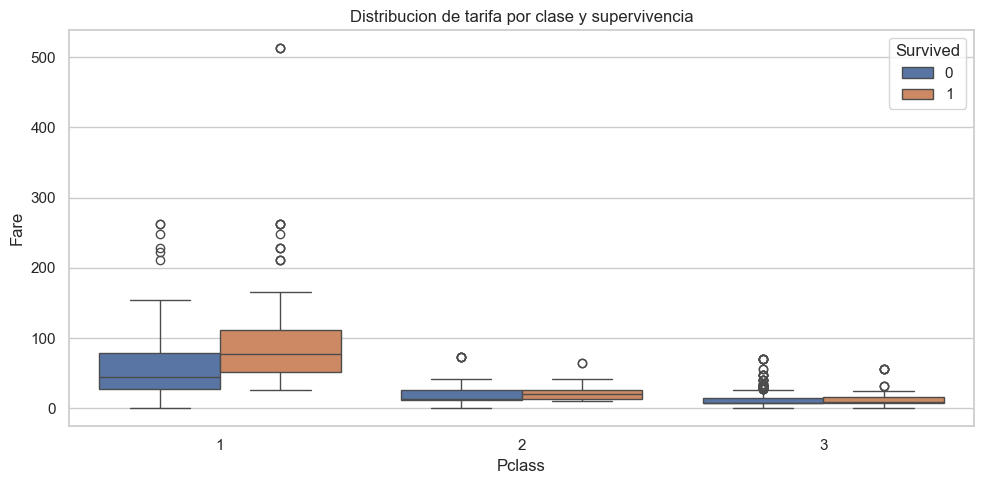

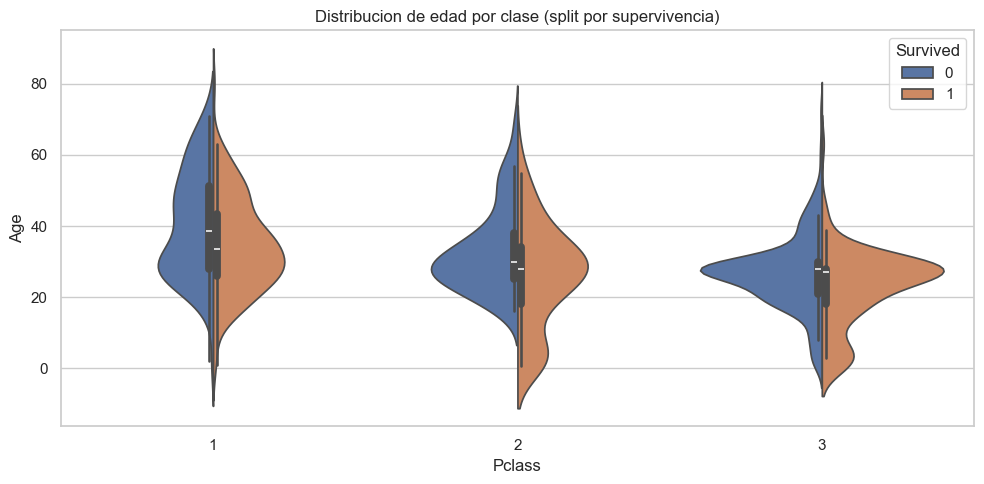

In [40]:
# Boxplot: detectar outliers y distribucion
plt.figure(figsize=(10, 5))
sns.boxplot(data=clean, x="Pclass", y="Fare", hue="Survived")
plt.title("Distribucion de tarifa por clase y supervivencia")
plt.tight_layout()
plt.show()

# Violin plot: distribucion + densidad
plt.figure(figsize=(10, 5))
sns.violinplot(data=clean, x="Pclass", y="Age", hue="Survived", split=True)
plt.title("Distribucion de edad por clase (split por supervivencia)")
plt.tight_layout()
plt.show()

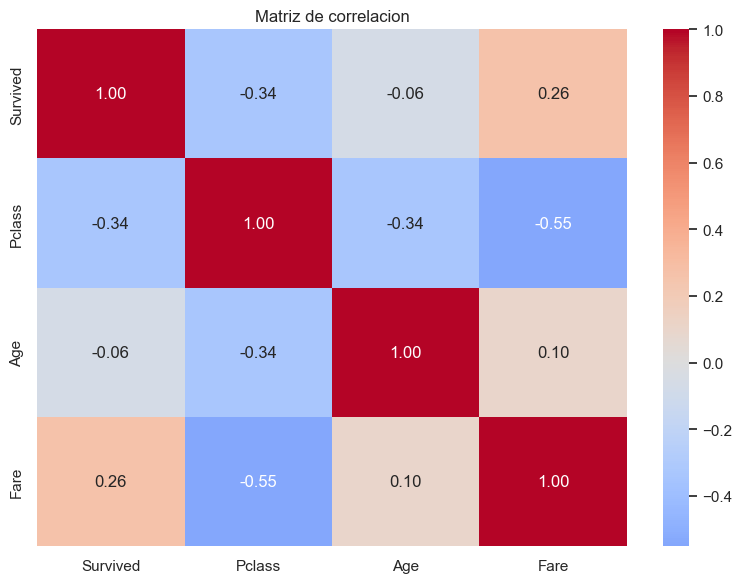

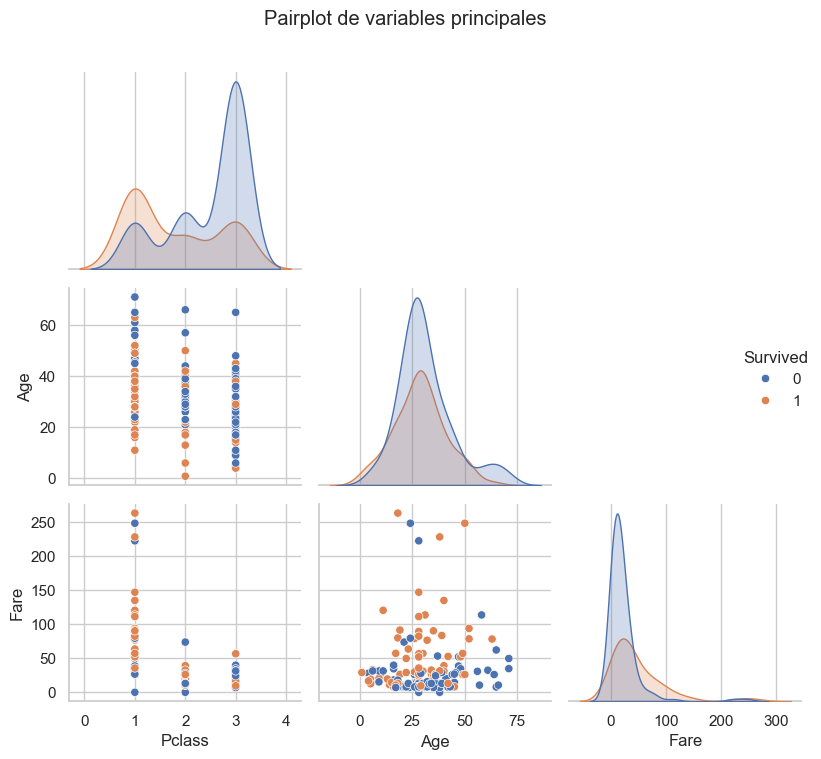

In [41]:
# Heatmap de correlaciones
plt.figure(figsize=(8, 6))
corr_matrix = clean[["Survived", "Pclass", "Age", "Fare"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

# Pairplot: relaciones múltiples
sample_for_pair = clean[["Survived", "Pclass", "Age", "Fare"]].dropna().sample(200, random_state=42)
sns.pairplot(sample_for_pair, hue="Survived", diag_kind="kde", corner=True)
plt.suptitle("Pairplot de variables principales", y=1.01)
plt.tight_layout()
plt.show()

## 16) IO serio: parquet y chunking

Parquet es más eficiente que CSV. Chunking para datasets grandes.

In [42]:
# Guardar y leer en parquet (más rápido y compacto que CSV)
clean.to_parquet("data/titanic.parquet", index=False)
df_parquet = pd.read_parquet("data/titanic.parquet")
df_parquet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_vs_class_mean,age_diff_vs_class,adult,fare_category,fare_tier,Fare_f32,new_col,Title,Title_clean,name_clean,has_mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.932627,-3.932627,1,low,low,7.250000,1.0,Mr,Mr,"braund, mr. owen harris",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,36.812130,1.187870,1,high,premium,71.283302,NaN,Mrs,Mrs,"cumings, mrs. john bradley (florence briggs th...",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.932627,0.067373,1,low,low,7.925000,1.0,Miss,Miss,"heikkinen, miss. laina",0


In [43]:
# Chunking: procesar datasets grandes por bloques
chunk_results = []
for chunk in pd.read_csv("data/titanic.csv", chunksize=100):
    # Procesar cada chunk
    chunk_agg = chunk.groupby("Pclass")["Survived"].mean()
    chunk_results.append(chunk_agg)

# Combinar resultados
final = pd.concat(chunk_results, axis=1).mean(axis=1)
print("Supervivencia promedio por clase (via chunks):")
print(final)

Supervivencia promedio por clase (via chunks):
Pclass
1    0.615602
2    0.474609
3    0.241986
dtype: float64


## 17) Cuando NO usar pandas

Senior sabe cuando pandas NO es la herramienta correcta.

Pandas NO es ideal para:

- **Datasets > 10GB en RAM**: considerar Dask, Polars, PySpark.
- **Joins masivos repetidos**: bases de datos SQL son más eficientes.
- **Procesamiento distribuido**: Spark, Dask distributed.
- **Alta concurrencia**: pandas no es thread-safe.

Alternativas:
- `polars`: más rápido, mejor memoria.
- `dask`: pandas distribuido.
- `pyspark`: big data distribuido.
- `DuckDB`: SQL analitico ultra-rápido sobre DataFrames.

## 23) Troubleshooting y errores comunes

Soluciones rápidas a problemás frecuentes.

In [44]:
# Error comun 1: KeyError
try:
    valor = clean["columna_inexistente"]
except KeyError as e:
    print(f"ERROR KeyError: {e}")
    print("Solucion: verificar con clean.columns")

# Error comun 2: ValueError en merge por tipos incompatibles
# Asegurar que las columnas de join tengan el mismo dtype

# Error comun 3: MemoryError
# Solucion: usar chunking, optimizar dtypes, o cambiar a Dask/Polars

# Error comun 4: AttributeError 'Series' object has no attribute 'columns'
# Solucion: verificar si es Series (1D) o DataFrame (2D)
print(f"Type: {type(clean['Age'])} -> usa .shape, no .columns")
print(f"Type: {type(clean[['Age']])} -> tiene .columns")

ERROR KeyError: 'columna_inexistente'
Solucion: verificar con clean.columns
Type: <class 'pandas.Series'> -> usa .shape, no .columns
Type: <class 'pandas.DataFrame'> -> tiene .columns
